## Let's fit  g(t)=4t/(1+10t^2)  using y=a+bt+ct^2

In [1]:
import numpy as np
import sklearn

In [2]:
np.random.seed(42)

In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [8]:
X=np.linspace(0, 1, 100).reshape(100, 1)

In [9]:
X.shape

(100, 1)

In [10]:
X[:5]

array([[ 0.        ],
       [ 0.01010101],
       [ 0.02020202],
       [ 0.03030303],
       [ 0.04040404]])

In [11]:
def g(t):
    return 4*t/(1+10*t*t)

In [13]:
z=np.arange(0,1,0.1)
z.shape

(10,)

In [14]:
z[:5]

array([ 0. ,  0.1,  0.2,  0.3,  0.4])

In [15]:
y=g(z)

In [16]:
y[:5]

array([ 0.        ,  0.36363636,  0.57142857,  0.63157895,  0.61538462])

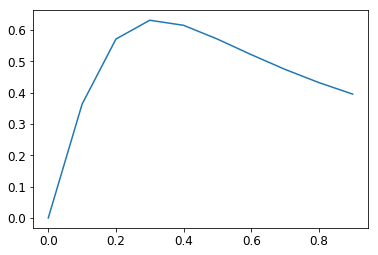

In [17]:
plt.plot(z,y)

In [19]:
G=g(X)

In [21]:
G.shape

(100, 1)

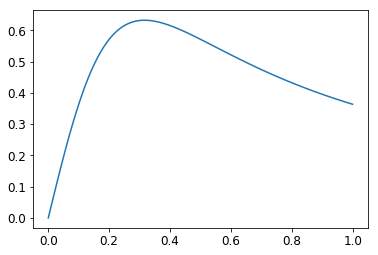

In [22]:
plt.plot(X,G)

## Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.
### class sklearn.preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)

In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [24]:
poly_features

PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)

In [25]:
X.shape

(100, 1)

# 產生  x^1, x^2

### fit_transform(X, y=None, **fit_params)
### Fits transformer to X and y with optional parameters fit_params and returns a transformed version of X

In [26]:
X_poly = poly_features.fit_transform(X)

In [27]:
X_poly.shape

(100, 2)

In [12]:
(-0.75275929)*(-0.75275929)

0.566646548681304

In [28]:
X_poly[:5]

array([[ 0.        ,  0.        ],
       [ 0.01010101,  0.00010203],
       [ 0.02020202,  0.00040812],
       [ 0.03030303,  0.00091827],
       [ 0.04040404,  0.00163249]])

###  X_poly now contains the original feature of X plus the square of this feature.

In [30]:
from sklearn.linear_model import LinearRegression

### class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)

In [31]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, G)
lin_reg.intercept_, lin_reg.coef_

(array([ 0.22702093]), array([[ 1.48423582, -1.47029498]]))

In [32]:
lin_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

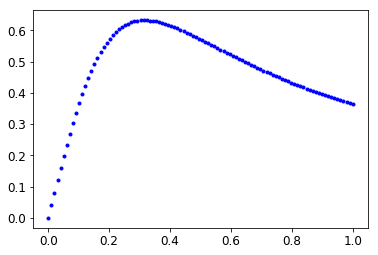

In [33]:
plt.plot(X, G, "b.")

### transform(X)
### Transform data to polynomial features

In [34]:
X_new=np.linspace(0, 1, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)

In [35]:
X_new.shape

(100, 1)

In [36]:
X_new_poly.shape

(100, 2)

In [37]:
X_new[:2]

array([[ 0.        ],
       [ 0.01010101]])

In [38]:
X_new_poly[:2]

array([[ 0.        ,  0.        ],
       [ 0.01010101,  0.00010203]])

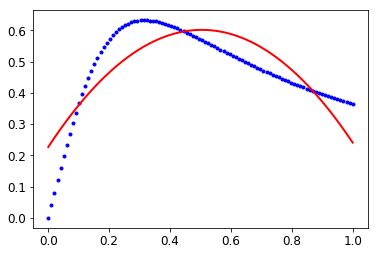

In [39]:
plt.plot(X, G, "b.")
y_new = lin_reg.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")